In [338]:
import re

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [339]:
plt.rcParams["figure.figsize"] = (18, 7)
sns.set_theme()

In [340]:
df = pd.read_csv('data/train.csv', sep=',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3\. Ознакомиться с основными параметрами датасета, используя функции библиотеки pandas, включая следующие данные:

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [342]:
# Количество точек данных (измерений) в наборе
len(df.shape)

2

In [343]:
# Количество полей данных (атрибутов)
df.shape[1]

12

In [344]:
# Тип данных каждого поля, шкала каждого поля
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [345]:
# Количество отсутствующих значений для каждого поля
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [346]:
# Количество и названия константных и уникальных полей
df.apply(lambda s: (u := len(s.unique())) == 1 or u == len(s)).rename('const_or_uniq')

PassengerId     True
Survived       False
Pclass         False
Name            True
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
Name: const_or_uniq, dtype: bool

In [347]:
def apply(s: pd.Series):
    u = s.unique()
    n = len(u)
    return n, u if n < 15 else '...'


df.apply(apply).transpose()

,0,1
PassengerId,891,...
Survived,2,"[0, 1]"
Pclass,3,"[3, 1, 2]"
Name,891,...
Sex,2,"[male, female]"
Age,89,...
SibSp,7,"[1, 0, 3, 4, 2, 5, 8]"
Parch,7,"[0, 1, 2, 5, 3, 4, 6]"
Ticket,681,...
Fare,248,...


### 4. Удалить из набора поля, не несущие информативной нагрузки - содержащие уникальные либо константные значения

In [348]:
tidy_df = df.drop(['PassengerId', 'Name'], axis=1)
tidy_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


### 5. Заменить возраст пассажиров на год рождения

In [349]:
TITANIK_REST_IN_PEACE_YEAR = 1912
tidy_df['Age'] = tidy_df['Age'].fillna(tidy_df['Age'].mean())  # задание 7 заранее
tidy_df['Age'] = (TITANIK_REST_IN_PEACE_YEAR - tidy_df['Age']).astype(int)
tidy_df = tidy_df.rename(columns={'Age': 'birth_year'})
tidy_df.head()

,Survived,Pclass,Sex,birth_year,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,1890,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,1874,1,0,PC 17599,71.2833,C85,C
2,1,3,female,1886,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,1877,1,0,113803,53.1000,C123,S
4,0,3,male,1877,0,0,373450,8.0500,NaN,S


### 6. Переименовать все названия колонок на русском языке

In [350]:
tidy_df = tidy_df.rename(columns={
    'Survived': 'Выживший',
    'Pclass': 'Класс пассажира',
    'Sex': 'Пол',
    'birth_year': 'Год рождения',
    'SibSp': 'Семья <',
    'Parch': 'Семья >',
    'Ticket': 'Билет',
    'Fare': 'Стоимость билета',
    'Cabin': 'Кабина',
    'Embarked': 'Порт погрузки'
})
tidy_df.head()

,Выживший,Класс пассажира,Пол,Год рождения,Семья <,Семья >,Билет,Стоимость билета,Кабина,Порт погрузки
0,0,3,male,1890,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,1874,1,0,PC 17599,71.2833,C85,C
2,1,3,female,1886,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,1877,1,0,113803,53.1000,C123,S
4,0,3,male,1877,0,0,373450,8.0500,NaN,S


### 7. Заменить все отсутствующие данные средним значением (в случае числового поля) либо самым распространенным в категориальных полях.

In [351]:
tidy_df.isna().sum()

Выживший              0
Класс пассажира       0
Пол                   0
Год рождения          0
Семья <               0
Семья >               0
Билет                 0
Стоимость билета      0
Кабина              687
Порт погрузки         2
dtype: int64

In [352]:
cabin = tidy_df['Кабина']
tidy_df['Кабина'] = cabin.fillna(cabin.mode().iloc[0])
embarked = tidy_df['Порт погрузки']
tidy_df['Порт погрузки'] = embarked.fillna(embarked.mode().iloc[0])

In [353]:
tidy_df.isna().sum()

Выживший            0
Класс пассажира     0
Пол                 0
Год рождения        0
Семья <             0
Семья >             0
Билет               0
Стоимость билета    0
Кабина              0
Порт погрузки       0
dtype: int64

### 8. Вывести Гистограмму распределения выживших по возрасту

In [354]:
# экстренно возвращаем возраст в таблицу
tidy_df['Возраст'] = df['Age']
survived_df = tidy_df[tidy_df['Выживший'] == 1]

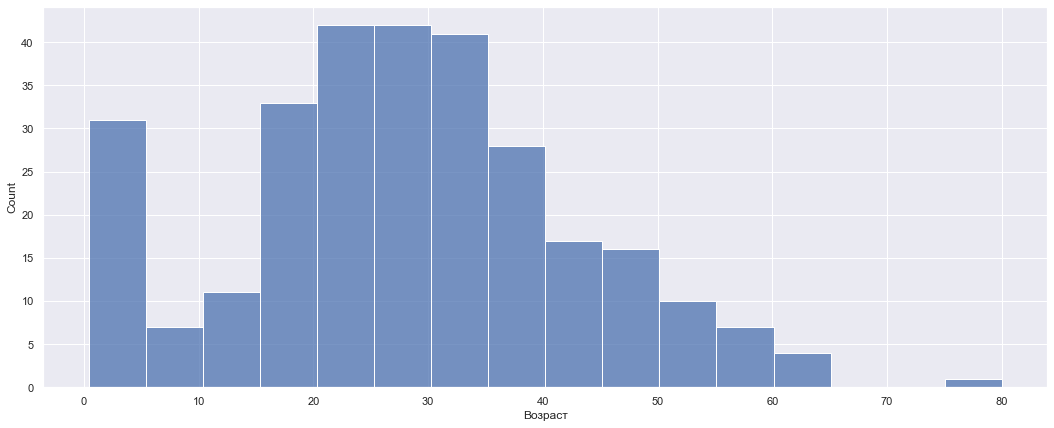

In [355]:
_ = sns.histplot(x=survived_df['Возраст'])

### 9. Вывести гистограмму распределения выживших по возрасту и классу (Pclass)

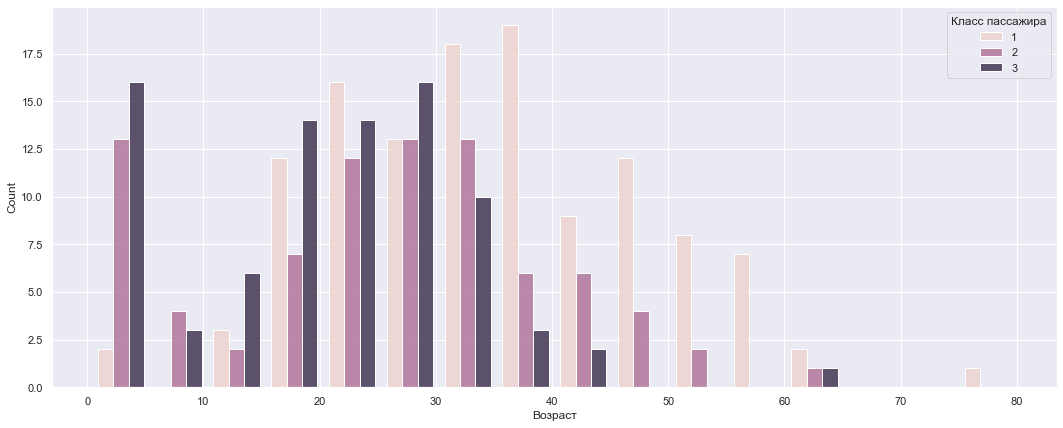

In [356]:
_ = sns.histplot(
    x=survived_df['Возраст'],
    hue=survived_df['Класс пассажира'],
    multiple='dodge',
    shrink=.8
)

### 10. Гистограмма распределения выживших по полу человека

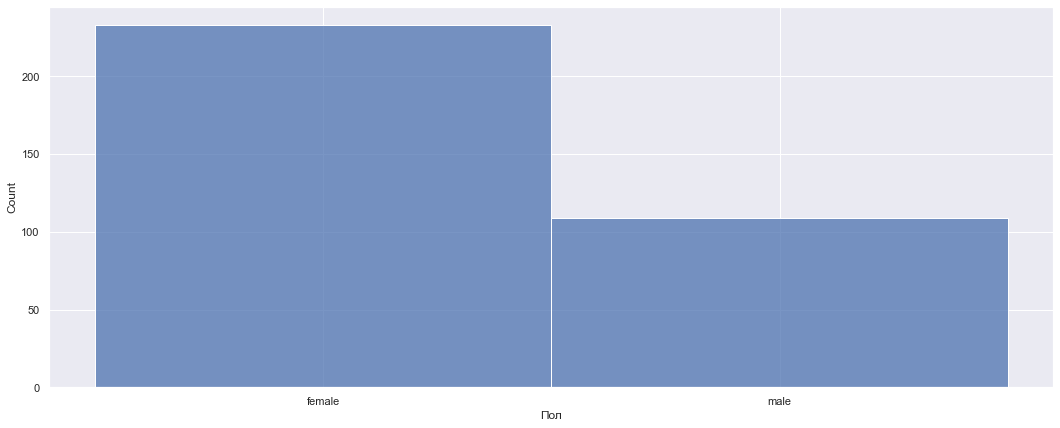

In [357]:
_ = sns.histplot(x=survived_df['Пол'])

### 11. Вывести титулы в отдельную колонку, убрать самые редкие из них

In [358]:
pattern = re.compile(r', (\w+\.).*')
titles = df['Name'].str.extract(pattern)
n_titles = titles.value_counts()
n_titles

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Major.         2
Mlle.          2
Capt.          1
Don.           1
Jonkheer.      1
Lady.          1
Mme.           1
Ms.            1
Sir.           1
dtype: int64

In [359]:
rare_titles = n_titles[n_titles < 40]
rare_titles = rare_titles.index.get_level_values(0)
rare_titles

Index(['Dr.', 'Rev.', 'Col.', 'Major.', 'Mlle.', 'Capt.', 'Don.', 'Jonkheer.',
       'Lady.', 'Mme.', 'Ms.', 'Sir.'],
      dtype='object', name=0)

In [360]:
titles[titles.isin(rare_titles)] = 'Rare title'
tidy_df['Титул'] = titles
tidy_df

,Выживший,Класс пассажира,Пол,Год рождения,Семья <,Семья >,Билет,Стоимость билета,Кабина,Порт погрузки,Возраст,Титул
0,0,3,male,1890,1,0,A/5 21171,7.2500,B96 B98,S,22.0,Mr.
1,1,1,female,1874,1,0,PC 17599,71.2833,C85,C,38.0,Mrs.
2,1,3,female,1886,0,0,STON/O2. 3101282,7.9250,B96 B98,S,26.0,Miss.
3,1,1,female,1877,1,0,113803,53.1000,C123,S,35.0,Mrs.
4,0,3,male,1877,0,0,373450,8.0500,B96 B98,S,35.0,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,1885,0,0,211536,13.0000,B96 B98,S,27.0,Rare title
887,1,1,female,1893,0,0,112053,30.0000,B42,S,19.0,Miss.
888,0,3,female,1882,1,2,W./C. 6607,23.4500,B96 B98,S,NaN,Miss.
889,1,1,male,1886,0,0,111369,30.0000,C148,C,26.0,Mr.
